In [23]:
import pandas as pd
from tqdm import tqdm
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/preprocessed_dataset.csv')
dataset.head()

,overall,reviewText,description,brand,price,asin,preprocessedReviewText
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('i', 'NOUN', 0.0), ('read', 'VERB', 0.0), ('..."
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('or', 'CONJ', 0.0), ('maybe', 'ADV', 0.0), (..."
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('having', 'VERB', 0.0), ('previously', 'ADV'..."
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('35', 'NUM', 0.0), ('star', 'NOUN', 0.0), ('..."
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,17.99,B000FYU4SO,"[('i', 'NOUN', 0.0), ('want', 'VERB', 1.0), ('..."


In [3]:
descr = dataset[['description', 'asin']]
descr.drop_duplicates(inplace=True)
descr

C:\Users\Utente\AppData\Local\Temp\ipykernel_16256\3635033382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr.drop_duplicates(inplace=True)


,description,asin
0,['Like new in box great looking phone get it b...,B000FYU4SO
8,['The sleek VX8300 is built for serious mobile...,B000G2TLIO
25,"[""The Moto Razr V3 is expertly crafted to deli...",B000G7LZCO
32,['Use the Nokia N95 for connecting to mobile B...,B000PEOLAG
37,"[""Now slimmer and lighter than ever, you'll be...",B000WA1ESK
...,...,...
16752,['The Studio Touch is an engineering wonder wi...,B01GUFAFP8
16759,['The energy XL is a stunning smartphone that ...,B01GWUXN5K
16775,['iPhone with iOS 9; Lightning to USB Cable; U...,B01GXAT0BK
16826,"[""The Samsung Galaxy S7 active Smartphone runs...",B01H93TCCM


In [15]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is alr

True

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
def build_ontolgy(df):
    nouns = []
    for index, row in tqdm(df.iterrows(), total = len(df)):
        text = row['description']
        text_cleaned = re.sub(r'[^\w\s]', '', text) #cleaning
        words = nltk.word_tokenize(text_cleaned) #tokenization
        preprocessed_words = [lemmatizer.lemmatize(w.lower()) for w in words if not w in stop_words] #stopwords removal and lemmatization
        #print(filter_text)
        tagged_words = nltk.pos_tag(preprocessed_words, tagset='universal') #POS-tagging
        for word, tag in tagged_words:
            if(tag == 'NOUN'):
                nouns.append(word)
            
    return nouns

In [19]:
ont = build_ontolgy(descr)

100%|████████████████████████████████████████████████████████████████████████████████| 438/438 [00:11<00:00, 38.42it/s]


In [21]:
from collections import Counter

nouns_freq = Counter(ont)
#print(value_counts)
# Convert Counter to DataFrame
df_nouns_freq = pd.DataFrame(nouns_freq.items(), columns=['value', 'count'])
df_nouns_freq = df_nouns_freq.sort_values(by='count', ascending=False)
df_nouns_freq.head(20)

,value,count
1,phone,435
73,camera,398
25,smartphone,248
29,feature,246
147,video,234
38,display,219
554,product,188
49,screen,160
1019,galaxy,157
154,music,155


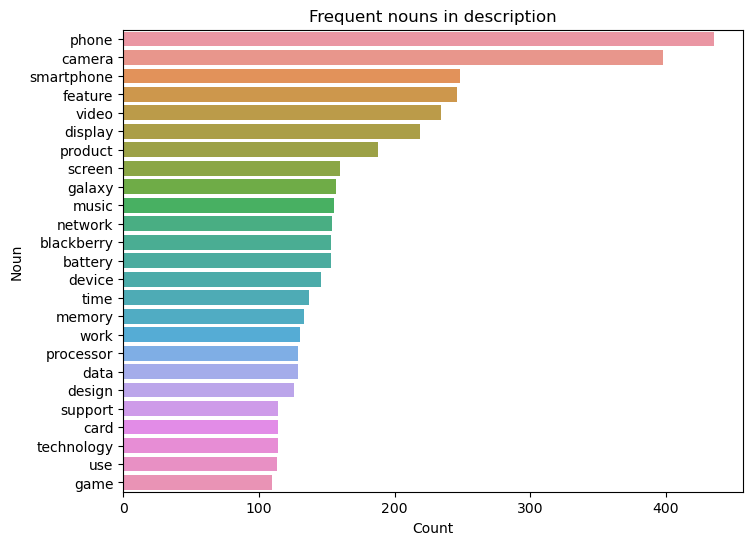

In [24]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x = df_nouns_freq['count'][:25], y = df_nouns_freq['value'][:25], orient='h')
plt.title('Frequent nouns in description')
plt.xlabel('Count')
plt.ylabel('Noun')
plt.show()

In [25]:
df_nouns_freq.to_csv('data/ontology.csv', index=False, sep=';')